# First Name:
# Last Name:

# Import Libraries  

In [16]:
import pandas as pd
import statsmodels.api as sm

import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np

# Import Data

In [2]:

# Load the dataset with explicit encoding
data = pd.read_csv('bottle.csv', encoding='latin1', low_memory=False)


# Data management 

In [6]:

# Select four quantitative variables (response variable and three explanatory variables)
response_variable = 'T_degC'
explanatory_variables = ['Salnty', 'O2ml_L', 'PO4uM']

# Remove rows with missing values in any of the selected variables
data = data[[response_variable] + explanatory_variables].dropna()


# Correlation between each explantory variable and response variable

In [13]:
# Step 3: Pre-testing plan
# In this step, list possible candidate combinations of individual regression models
# For example, considering combinations of Salinity, O2 concentration, and Phosphate concentration as explanatory variables

# Combination 1: Salinity and O2 concentration
model_1 = sm.OLS(data[response_variable], sm.add_constant(data[['Salnty', 'O2ml_L']])).fit()
model_1


In [14]:

# Combination 2: O2 concentration and Phosphate concentration
model_2 = sm.OLS(data[response_variable], sm.add_constant(data[['O2ml_L', 'PO4uM']])).fit()
model_2

In [15]:

# Combination 3: Salinity, O2 concentration, and Phosphate concentration
model_3 = sm.OLS(data[response_variable], sm.add_constant(data[['Salnty', 'O2ml_L', 'PO4uM']])).fit()
model_3

# Scatter plot between each explantory variable and response variable

R-value for Salnty vs T_degC: -0.4886151763337268


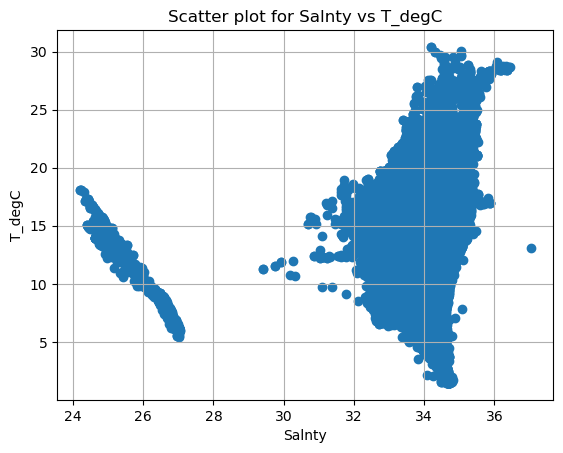

R-value for O2ml_L vs T_degC: 0.828930796310497


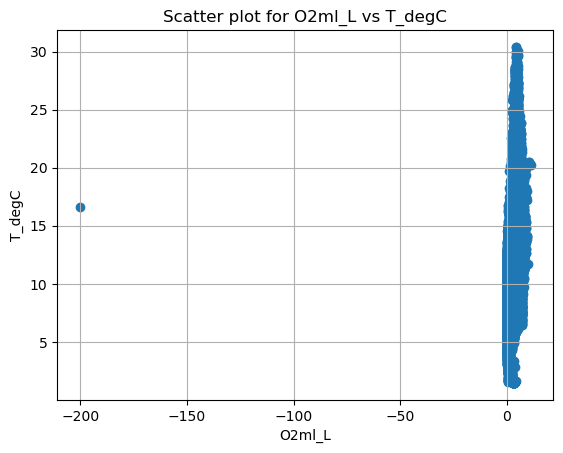

R-value for PO4uM vs T_degC: -0.9067362996016157


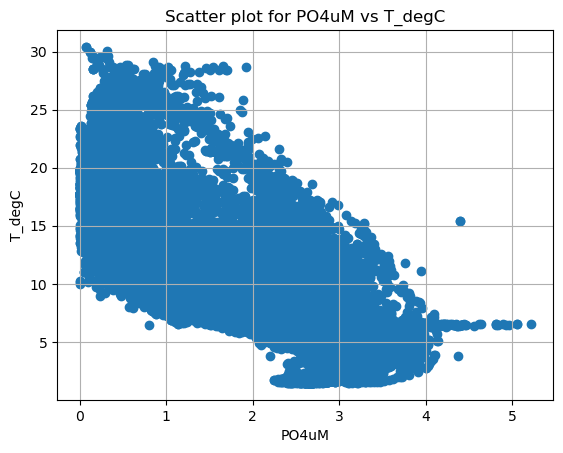

R-value for T_degC vs T_degC: 1.0


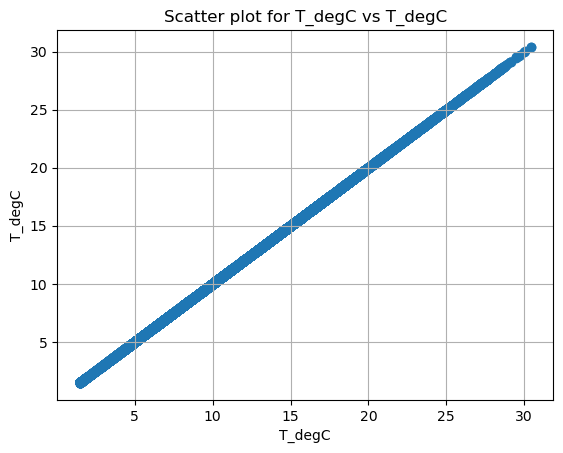

In [12]:
import matplotlib.pyplot as plt

# Step 2: Scatter plots and r-values
for var in explanatory_variables + [response_variable]:
    plt.scatter(data[var], data[response_variable])
    plt.title(f'Scatter plot for {var} vs {response_variable}')
    plt.xlabel(var)
    plt.ylabel(response_variable)
    plt.grid(True)
    
    # Save the scatter plot as an image
    plt.savefig(f'{var}_vs_{response_variable}_scatter.png')

    correlation_coefficient = data[var].corr(data[response_variable])
    print(f'R-value for {var} vs {response_variable}: {correlation_coefficient}')

    # Show the plot (optional, depending on your preference)
    plt.show()

# Reset the plotting style
plt.style.use('default')


# Regression Analysis for each candidate

In [10]:

# Step 4: Pre-testing Regression analysis results
print("Pre-testing Regression analysis results:")
print("Model 1:")
print(model_1.summary())
print("\nModel 2:")
print(model_2.summary())
print("\nModel 3:")
print(model_3.summary())

Pre-testing Regression analysis results:
Model 1:
                            OLS Regression Results                            
Dep. Variable:                 T_degC   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.693
Method:                 Least Squares   F-statistic:                 4.717e+05
Date:                Sat, 13 Jan 2024   Prob (F-statistic):               0.00
Time:                        10:01:55   Log-Likelihood:            -9.3303e+05
No. Observations:              418824   AIC:                         1.866e+06
Df Residuals:                  418821   BIC:                         1.866e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
co

In [11]:


# Step 5: Pre-testing Regression equation/line
print("Pre-testing Regression equation/line:")
print("Model 1:")
print(f"{response_variable} = {model_1.params['const']} + {model_1.params['Salnty']} * Salnty + {model_1.params['O2ml_L']} * O2ml_L")
print("\nModel 2:")
print(f"{response_variable} = {model_2.params['const']} + {model_2.params['O2ml_L']} * O2ml_L + {model_2.params['PO4uM']} * PO4uM")
print("\nModel 3:")
print(f"{response_variable} = {model_3.params['const']} + {model_3.params['Salnty']} * Salnty + {model_3.params['O2ml_L']} * O2ml_L + {model_3.params['PO4uM']} * PO4uM")


Pre-testing Regression equation/line:
Model 1:
T_degC = -18.98248767500521 + 0.7012372595170413 * Salnty + 1.7547095749600117 * O2ml_L

Model 2:
T_degC = 24.618076548733523 + -1.225999027198047 * O2ml_L + -5.9245607498703325 * PO4uM

Model 3:
T_degC = -4.370432329791711 + 0.8475680482039132 * Salnty + -1.0975161402112414 * O2ml_L + -5.973922840472736 * PO4uM


# Q-Q plot for each candidate 

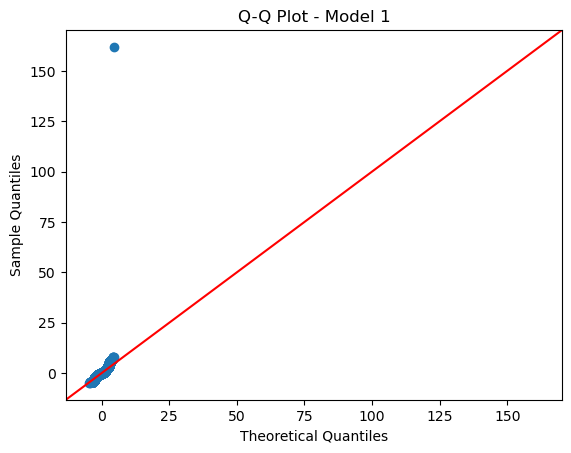

In [17]:

# Step 6: Q-Q plot for each candidate (multiple) regression model
sm.qqplot(model_1.resid, line='45', fit=True)
plt.title('Q-Q Plot - Model 1')
plt.savefig('QQ_Plot_Model_1.png')
plt.show()


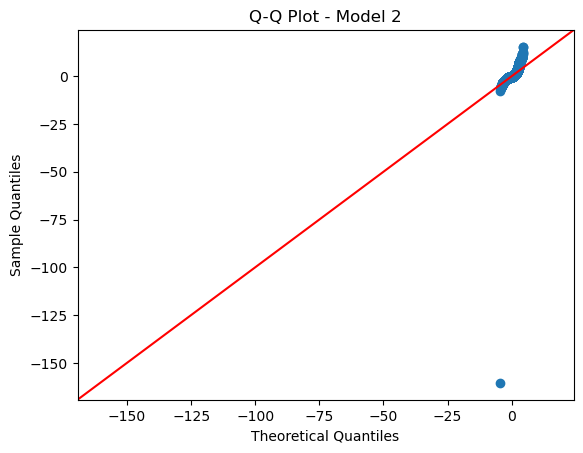

In [18]:
sm.qqplot(model_2.resid, line='45', fit=True)
plt.title('Q-Q Plot - Model 2')
plt.savefig('QQ_Plot_Model_2.png')
plt.show()


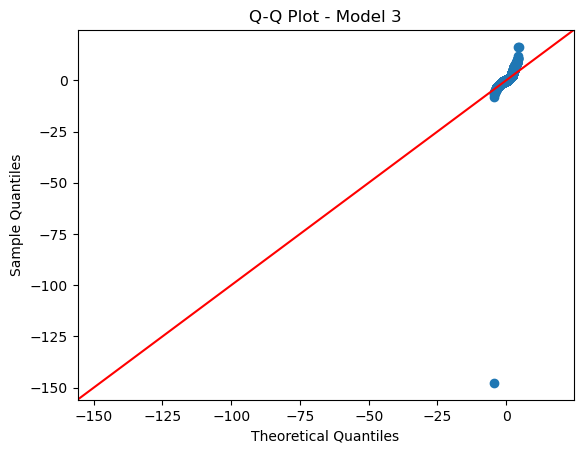

In [19]:
sm.qqplot(model_3.resid, line='45', fit=True)
plt.title('Q-Q Plot - Model 3')
plt.savefig('QQ_Plot_Model_3.png')
plt.show()

# standardized residual plots

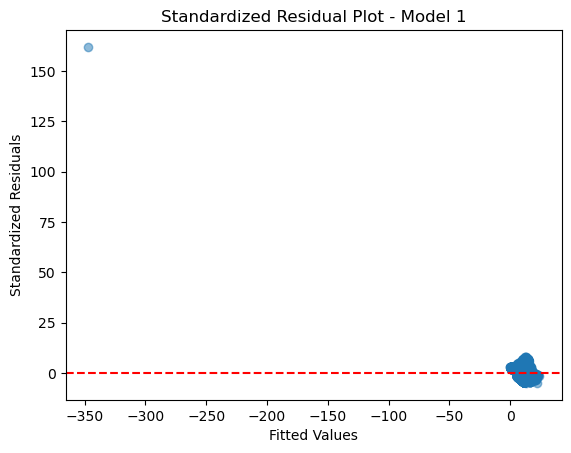

In [20]:
# Step 8: Residual Plot for each candidate model
# Substep 1: Standardized Residual plot
plt.scatter(model_1.fittedvalues, model_1.resid_pearson, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Standardized Residual Plot - Model 1')
plt.xlabel('Fitted Values')
plt.ylabel('Standardized Residuals')
plt.savefig('Standardized_Residual_Plot_Model_1.png')
plt.show()


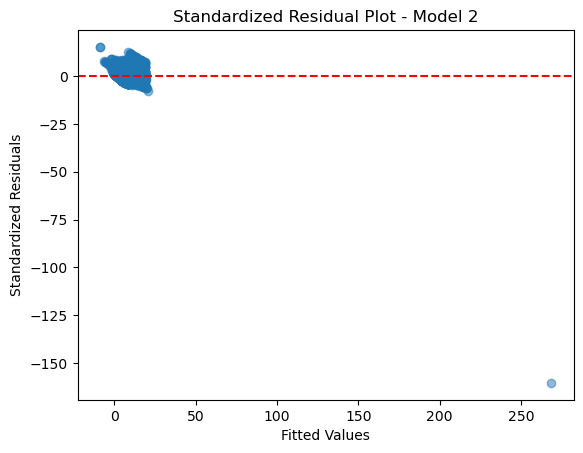

In [21]:
plt.scatter(model_2.fittedvalues, model_2.resid_pearson, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Standardized Residual Plot - Model 2')
plt.xlabel('Fitted Values')
plt.ylabel('Standardized Residuals')
plt.savefig('Standardized_Residual_Plot_Model_2.png')
plt.show()


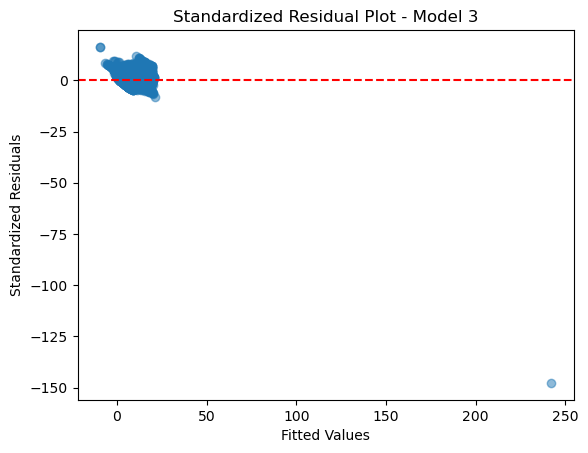

In [22]:
plt.scatter(model_3.fittedvalues, model_3.resid_pearson, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Standardized Residual Plot - Model 3')
plt.xlabel('Fitted Values')
plt.ylabel('Standardized Residuals')
plt.savefig('Standardized_Residual_Plot_Model_3.png')
plt.show()

In [23]:

# Substep 2: Percentage of observations over 2 standardized deviation
print(f'Model 1 - Percentage over 2 std deviations: {np.sum(np.abs(model_1.resid_pearson) > 2) / len(model_1.resid_pearson) * 100}%')
print(f'Model 2 - Percentage over 2 std deviations: {np.sum(np.abs(model_2.resid_pearson) > 2) / len(model_2.resid_pearson) * 100}%')
print(f'Model 3 - Percentage over 2 std deviations: {np.sum(np.abs(model_3.resid_pearson) > 2) / len(model_3.resid_pearson) * 100}%')


Model 1 - Percentage over 2 std deviations: 5.186665520600538%
Model 2 - Percentage over 2 std deviations: 4.119152675109354%
Model 3 - Percentage over 2 std deviations: 4.428113002120222%


In [24]:
# Substep 3: Percentage of observations over 2.5 standardized deviation
print(f'Model 1 - Percentage over 2.5 std deviations: {np.sum(np.abs(model_1.resid_pearson) > 2.5) / len(model_1.resid_pearson) * 100}%')
print(f'Model 2 - Percentage over 2.5 std deviations: {np.sum(np.abs(model_2.resid_pearson) > 2.5) / len(model_2.resid_pearson) * 100}%')
print(f'Model 3 - Percentage over 2.5 std deviations: {np.sum(np.abs(model_3.resid_pearson) > 2.5) / len(model_3.resid_pearson) * 100}%')


Model 1 - Percentage over 2.5 std deviations: 2.622103795388994%
Model 2 - Percentage over 2.5 std deviations: 2.2381716425037723%
Model 3 - Percentage over 2.5 std deviations: 2.4979466315206387%
